In [2]:
import math
import numpy as np
import pandas as pd
from scipy.stats import expon
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from openpyxl import load_workbook

df = pd.read_excel('Лукьянов Андрей.xlsx', engine='openpyxl')
rv = df['Выборка'].to_numpy()

In [3]:
from scipy.stats import cauchy
from scipy.stats import laplace

Рассмотрим гистограмму полученной выборки.

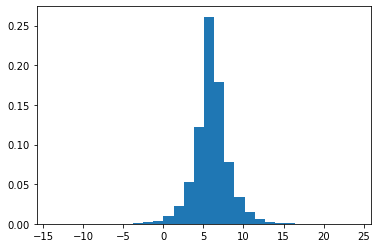

In [4]:
count, bins, _ = plt.hist(rv, bins = 30, density= True)

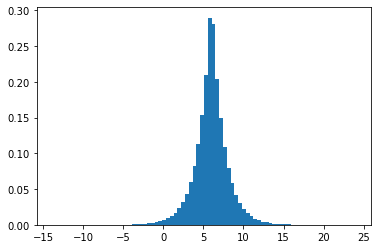

In [5]:
count, bins, _ = plt.hist(rv, bins = 80, density= True)

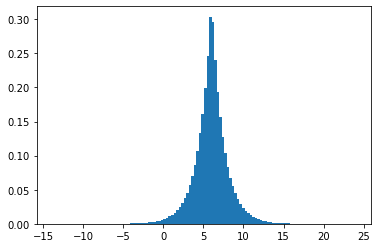

In [6]:
count, bins, _ = plt.hist(rv, bins = 120, density= True)

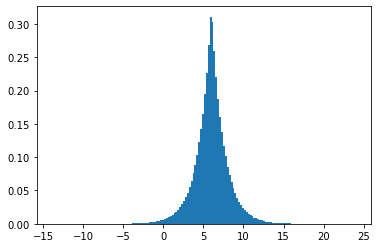

In [7]:
count, bins, _ = plt.hist(rv, bins = 160, density= True)

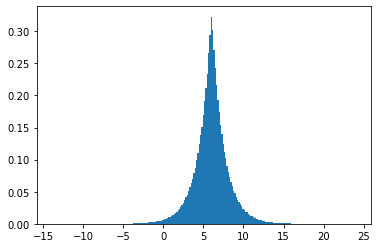

In [8]:
count, bins, _ = plt.hist(rv, bins = 230, density= True)

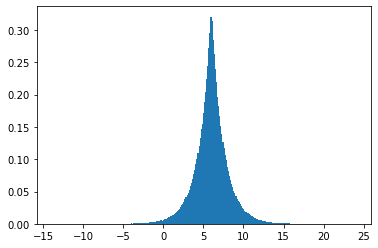

In [9]:
count, bins, _ = plt.hist(rv, bins = 280, density= True)

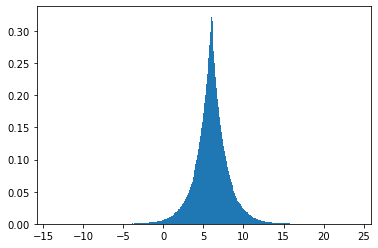

In [10]:
count, bins, _ = plt.hist(rv, bins = 320, density= True)

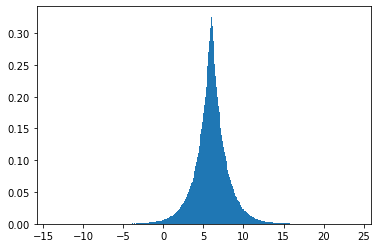

In [11]:
count, bins, _ = plt.hist(rv, bins = 350, density= True)

График плотности симметричен. Существует один единственный максимум плотности и он достаточно заострен. Можно попробовать похожее на нормальное, но с заостренным пиком распределение: распределение Коши

Оценим выборочным средним первый и второй моменты

In [12]:
E1 = np.sum(rv)/len(rv)
print(E1)

5.997445636573299


Оценим второй момент и дисперсию

In [13]:
E2 = np.sum(np.square(rv))/len(rv)
print(E2)

40.4905880849367


In [14]:
D = E2 - E1*E1
D # S(2,n)

4.521233921284598

In [15]:
D1 = D*len(rv)/(len(rv) - 1)

In [16]:
D1

4.52123844252304

Гипотеза : Коши со сдвигом 6 и параметром 1

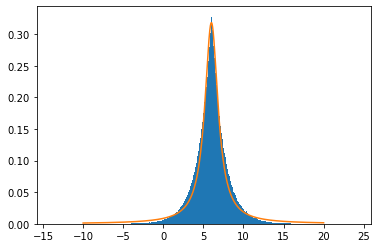

In [17]:
count, bins, _ = plt.hist(rv, bins = 600, density= True)
x_lin = np.linspace(-10, 20, 2000)
crv = cauchy.pdf(x_lin, loc = 6, scale = 1)
plt.plot(x_lin, crv)

Ложится, но не очень хорошо. Еще распределения с заостренным пиком: Двухстороннее экспоненциальное. Попробуем его
Решаем уравнение 
2/a^2 = 4.5 
a = 2/3 => 
scale = 3/2

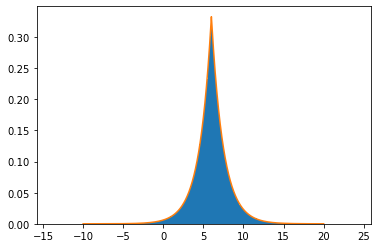

In [18]:
count, bins, _ = plt.hist(rv, bins = 600, density= True)
x_lin = np.linspace(-10, 20, 2000)
lrv = laplace.pdf(x_lin, loc = 6, scale = 1.5)
plt.plot(x_lin, lrv)

Оценка параметров : b == EX, a = sqrt(2/DX)

Метод моментов : параметр a

In [19]:
OMMa = np.sum(rv)/len(rv)

In [20]:
OMMa

5.997445636573299

Метод моментов : параметр b

In [21]:
OMMb = math.sqrt(2/D)

In [22]:
OMMb

0.6650993282227567

Построим оценки параметроd ММП

In [23]:
a,scale = laplace.fit(rv) #returns loc and scale where loc = a = EX, scale = lambda = 1/b

In [24]:
a

5.9984604

In [25]:
b = 1/scale

In [26]:
b

0.6649667579246098

Исследуем оценки на асимптотическую нормальность и состоятельность
1. Состоятельность (состоятельность исследуем благодаря ЗБЧ)

In [27]:
vals = [rv[:i] for i in range(1, len(rv))]

In [28]:
rv_square = np.square(rv)

In [29]:
vals_square = [rv_square[:i] for i in range(1, len(rv))]

In [30]:
sums = np.zeros(1000000)
sums[0] = vals[0]

In [31]:
for i in range(1,1000000):
    sums[i] = sums[i-1] + rv[i]

In [32]:
a_MM = [sums[i]/(i + 1) for i in range(1000000)]

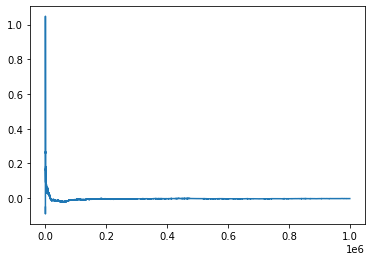

In [33]:
plt.plot(np.array(a_MM) - 6)

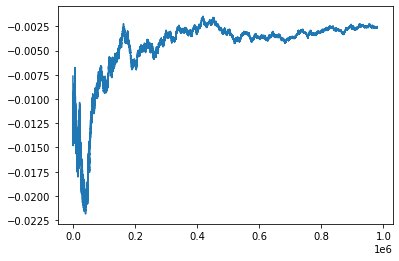

In [34]:
plt.plot(np.array(a_MM[20000:]) - 6)

In [35]:
sums_square = np.zeros(1000000)
sums_square[0] = rv_square[0]
for i in range(1,1000000):
    sums_square[i] = sums_square[i - 1] + rv_square[i]

In [36]:
d_MM = [sums_square[i]/[i+1] - (a_MM[i])*(a_MM[i]) - 4.5 for i in range(1000000)]

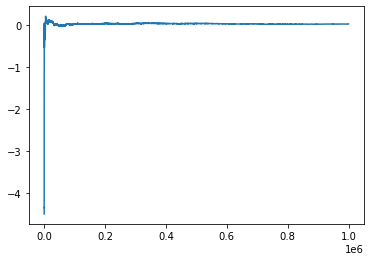

In [37]:
plt.plot(d_MM)

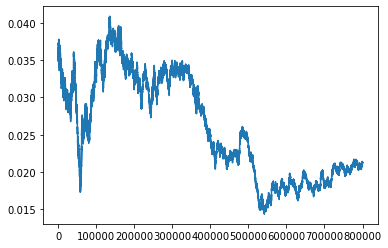

In [38]:
plt.plot(d_MM[200000:])

In [39]:
d0_MM = [i*(sums_square[i]/[i+1] - (a_MM[i])*(a_MM[i]))/(i+1) - 4.5 for i in range(1000000)]

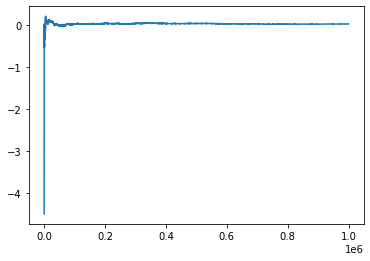

In [40]:
plt.plot(d0_MM)

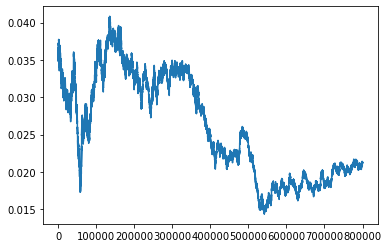

In [41]:
plt.plot(d0_MM[200000:])

# используем метод .fit для оценки параметров методом максимального правдоподобия:
1.Вычисляем функцию(ее логарифм) максимального правдоподобия

2.Ищем ее экстремум алгоритмом оптимизации Нелдера-Мида

In [42]:
MLE = [laplace.fit(rv[:i]) for i in range(995000,len(rv))]

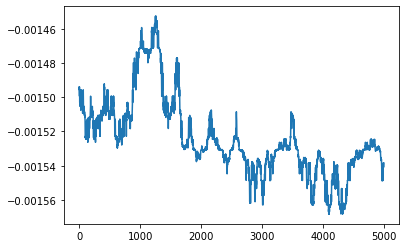

In [43]:
plt.plot([k[0] - 6 for k in MLE])

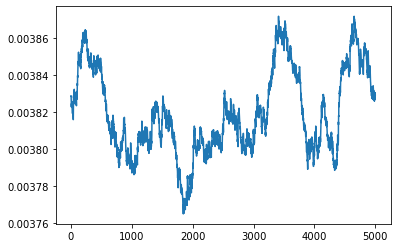

In [44]:
plt.plot([k[1] - 1.5 for k in MLE])

2. Асимптотическая нормальность

Построим для разных n выборку из 1000 элементов и исследуем ее нормальность

In [45]:
lst = []
n = 20000
for i in range(1000):
    lst.append(math.sqrt(n)*(np.sum(laplace.rvs(size = n, loc = 6, scale = 1.5))/n - 6))

(array([  4.,  13.,  26.,  49.,  96., 138., 149., 146., 148., 102.,  62.,
         39.,  17.,  10.,   1.]),
 array([-6.12169527, -5.26229305, -4.40289082, -3.54348859, -2.68408636,
        -1.82468413, -0.9652819 , -0.10587967,  0.75352256,  1.61292478,
         2.47232701,  3.33172924,  4.19113147,  5.0505337 ,  5.90993593,
         6.76933816]),
 <BarContainer object of 15 artists>)

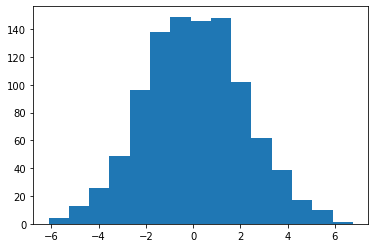

In [46]:
plt.hist(lst, bins = 15)

(array([ 2.,  2.,  5.,  8., 11., 15., 20., 29., 39., 57., 65., 73., 64.,
        85., 76., 70., 85., 63., 54., 48., 40., 22., 26., 13., 14.,  3.,
         7.,  3.,  0.,  1.]),
 array([-6.12169527, -5.69199416, -5.26229305, -4.83259193, -4.40289082,
        -3.9731897 , -3.54348859, -3.11378747, -2.68408636, -2.25438524,
        -1.82468413, -1.39498302, -0.9652819 , -0.53558079, -0.10587967,
         0.32382144,  0.75352256,  1.18322367,  1.61292478,  2.0426259 ,
         2.47232701,  2.90202813,  3.33172924,  3.76143036,  4.19113147,
         4.62083259,  5.0505337 ,  5.48023481,  5.90993593,  6.33963704,
         6.76933816]),
 <BarContainer object of 30 artists>)

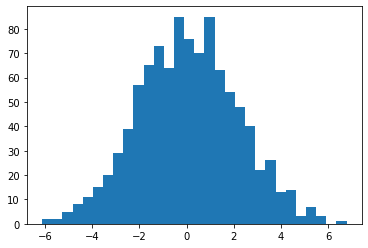

In [47]:
plt.hist(lst, bins = 30)

In [48]:
lst2 = []
n = 100000
for i in range(1000):
    lst2.append(math.sqrt(n)*(np.sum(laplace.rvs(size = n, loc = 6, scale = 1.5))/n - 6))

(array([ 1.,  2.,  1.,  5.,  3.,  8.,  7., 17.,  9.,  7., 16., 18., 24.,
        16., 28., 30., 39., 39., 45., 39., 50., 49., 45., 53., 57., 36.,
        40., 53., 36., 29., 32., 31., 24., 20., 12., 18., 10., 13., 11.,
        10.,  3.,  5.,  3.,  2.,  0.,  0.,  2.,  0.,  0.,  2.]),
 array([-5.75506548, -5.50343109, -5.2517967 , -5.00016232, -4.74852793,
        -4.49689354, -4.24525916, -3.99362477, -3.74199039, -3.490356  ,
        -3.23872161, -2.98708723, -2.73545284, -2.48381845, -2.23218407,
        -1.98054968, -1.7289153 , -1.47728091, -1.22564652, -0.97401214,
        -0.72237775, -0.47074336, -0.21910898,  0.03252541,  0.2841598 ,
         0.53579418,  0.78742857,  1.03906295,  1.29069734,  1.54233173,
         1.79396611,  2.0456005 ,  2.29723489,  2.54886927,  2.80050366,
         3.05213805,  3.30377243,  3.55540682,  3.8070412 ,  4.05867559,
         4.31030998,  4.56194436,  4.81357875,  5.06521314,  5.31684752,
         5.56848191,  5.82011629,  6.07175068,  6.32338507,

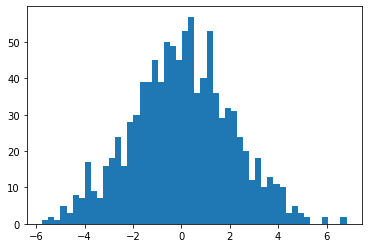

In [49]:
plt.hist(lst2, bins = 50)

In [50]:
lst2 = []
n = 10000
for i in range(1000):
    lst2.append(math.sqrt(n)*(np.sum(laplace.rvs(size = n, loc = 6, scale = 1.5))/n - 6))

In [51]:
for i in range(9000):
    lst2.append(math.sqrt(n)*(np.sum(laplace.rvs(size = n, loc = 6, scale = 1.5))/n - 6))

In [52]:
lst2 = np.array(lst2)

In [53]:
lst2 = lst2/math.sqrt(4.5)

In [54]:
lst2

array([-0.66470103,  0.72066742, -0.06131761, ..., -1.25500063,
       -1.37127935, -0.13881807])

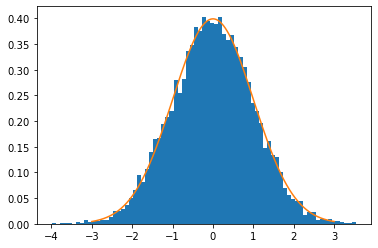

In [55]:
plt.hist(lst2, bins = 75, density = True)
x_lin = np.linspace(-3, 3, 2000)
crv = norm.pdf(x_lin)
plt.plot(x_lin, crv)

При бОльших n будет сходимость искомой величины к N(0,1)

In [56]:
lst3 = []
n = 10000
for i in range(10000):
    t = laplace.rvs(size = n, loc = 6, scale = 1.5)
    t2 = np.square(t)
    lst3.append(math.sqrt(n)*(np.sum(t2)/n - (np.sum(t)/n)*(np.sum(t)/n) - 4.5))

(array([  2.,   1.,   0.,   5.,   6.,  18.,  48.,  74.,  88., 132., 199.,
        277., 366., 463., 548., 653., 752., 738., 794., 763., 751., 700.,
        604., 477., 432., 318., 229., 194., 125.,  83.,  63.,  42.,  23.,
         13.,   8.,   7.,   2.,   1.,   0.,   1.]),
 array([-37.67960815, -35.68080183, -33.6819955 , -31.68318917,
        -29.68438284, -27.68557652, -25.68677019, -23.68796386,
        -21.68915754, -19.69035121, -17.69154488, -15.69273856,
        -13.69393223, -11.6951259 ,  -9.69631958,  -7.69751325,
         -5.69870692,  -3.6999006 ,  -1.70109427,   0.29771206,
          2.29651838,   4.29532471,   6.29413104,   8.29293737,
         10.29174369,  12.29055002,  14.28935635,  16.28816267,
         18.286969  ,  20.28577533,  22.28458165,  24.28338798,
         26.28219431,  28.28100063,  30.27980696,  32.27861329,
         34.27741961,  36.27622594,  38.27503227,  40.2738386 ,
         42.27264492]),
 <BarContainer object of 40 artists>)

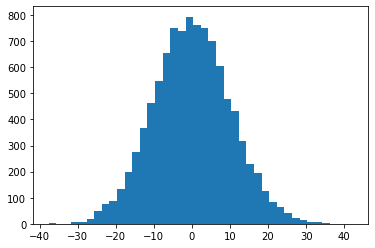

In [57]:
plt.hist(lst3, bins = 40)

Оценим асимптотическую дисперсию для искомой оценки ММП

In [58]:
lst3 = np.array(lst3)

In [59]:
x = (np.sum(lst3)/lst3.size)

In [60]:
sigma_square = - x*x + np.sum(np.square(lst3))/lst3.size

In [61]:
sigma = math.sqrt(sigma_square)

In [62]:
sigma

10.063531868962036

Приблизительно получаем асимптотическую дисперсию : 100, среднеквадратичное отклонение: 10

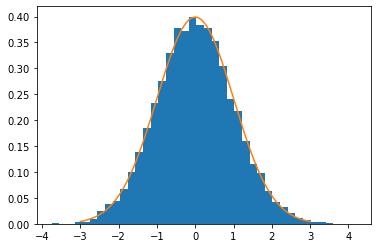

In [63]:
plt.hist(lst3/sigma, bins = 40, density = True)
x_lin = np.linspace(-3, 3, 2000)
crv = norm.pdf(x_lin)
plt.plot(x_lin, crv)

In [79]:
from scipy.stats import t, sem, kstest

# Строим доверительный интервал для математического ожидания(через распределение Стьюдента)

### Level 0.95

In [148]:
t.interval(0.95, len(rv)-1, loc=np.mean(rv), scale=sem(rv))

(5.993278120125916, 6.001613153020681)

### Level 0.99

In [149]:
t.interval(0.99, len(rv)-1, loc=np.mean(rv), scale=sem(rv))

(5.991968587724625, 6.002922685421972)

# Строим доверительный интервал для дисперсии(через хи-квадрат)

In [150]:
from scipy.stats import tvar, chi2

In [151]:
val = tvar(rv)

In [165]:
def variance_confidence_interval(data, level):
    n = len(data)               
    s2 = np.var(data, ddof=1)   
    df = n - 1          
    alpha = 1 - level
    upper = (n - 1) * s2 / chi2.ppf(alpha / 2, df)
    lower = (n - 1) * s2 / chi2.ppf(1 - alpha / 2, df)
    return lower, upper

# Level 0.95

In [166]:
variance_confidence_interval(rv, 0.95)

(4.508732558150758, 4.533796670485104)

In [168]:
variance_confidence_interval(rv, 0.99)

(4.504811507335628, 4.537751401016497)

# Критерий Колмогорова

In [170]:
kstest(rv, 'laplace', (a, 1/b))

KstestResult(statistic=0.0006969456207980562, pvalue=0.7160370970660825)

Так нельзя делать, потому что оцененные параметры есть случайные величины
Пример:

In [207]:
rand = laplace(loc = 6, scale = 1.5)

In [209]:
y = []
for n in tqdm(range(2, 100)):
    samples = []
    ktest = []
    for _ in range(100):
        for _ in range(100):
            sample1 = rand.rvs(n)
            b, a = laplace.fit(sample1)
            mean= b
            variance = 1/a
            samples.append((sum(sample1) - n*mean)/math.sqrt(n*variance))
        ktest.append(kstest(samples, 'norm')[0])
    y.append(sum(ktest)/100)

100%|██████████| 98/98 [02:55<00:00,  1.79s/it]


Text(0, 0.5, '$\\sup |F*_n(t)-F(t)|$')

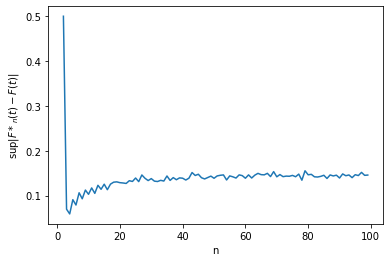

In [210]:
x = np.arange(2, 100)
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel(r'$\sup |F*_n(t)-F(t)|$')

# Шумы

In [488]:
noise = pd.read_excel('Лукьянов Андрей.xlsx', 'Sheet2', engine='openpyxl')
df = pd.read_excel('Лукьянов Андрей.xlsx', engine='openpyxl')
rv = df['Выборка'].to_numpy()

In [489]:
noise = np.array(noise['Шум'])
noise.shape

(6000,)

In [490]:
sample = np.concatenate([noise, rv])

In [491]:
sample.shape

(1006000,)

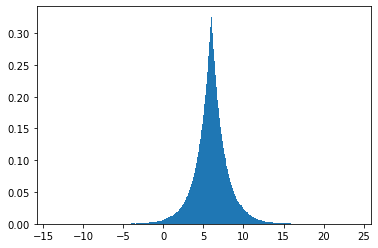

In [492]:
count, bins, _ = plt.hist(rv, bins = 300, density= True)

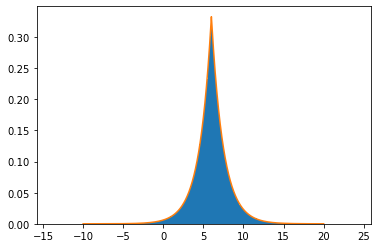

In [493]:
count, bins, _ = plt.hist(rv, bins = 600, density= True)
x_lin = np.linspace(-10, 20, 2000)
crv = laplace.pdf(x_lin, loc = 6, scale = 1.5)
plt.plot(x_lin, crv)

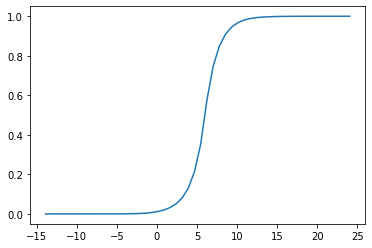

In [494]:
ecdf = ECDF(sample)
x = np.linspace(min(sample), max(sample))
edf = ecdf(x)
plt.plot(x, edf)

In [495]:
laplace_rv = laplace(loc=6, scale=1.5)

Сравним функции распределения эмпирическую и Лапласа с угаданными параметрами

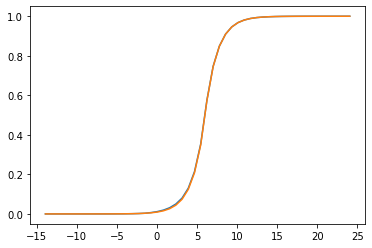

In [496]:
laplace_cdf = [laplace_rv.cdf(i) for i in x]
plt.plot(x, edf)
plt.plot(x, laplace_cdf)

Оценки ММ

In [497]:
n = len(sample)

E1 = np.sum(sample)/n
E2 = np.sum(np.square(sample))/n
D = E2 - E1**2
moment_scale = math.sqrt(2/D)
moment_loc = E1
print(moment_loc, moment_scale)

5.964697423039662 0.6536635352034147


In [498]:
fit_loc, fit_scale = laplace.fit(sample)
print(fit_loc, 1/fit_scale)

5.9894762 0.6546246614657364


In [499]:
moment_loc_array = []
moment_scale_array = []

for i in tqdm(range(100, n, 10000)):
    little_sample = sample[:i]
    E1 = np.sum(little_sample)/i
    E2 = np.sum(np.square(little_sample))/i
    D = E2 - E1**2
    moment_scale_i = math.sqrt(2/D)
    moment_loc_i = E1
    moment_scale_array.append(moment_scale_i)
    moment_loc_array.append(moment_loc_i)

100%|██████████| 101/101 [00:00<00:00, 300.25it/s]


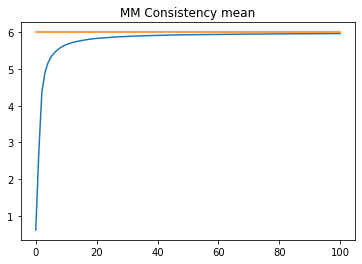

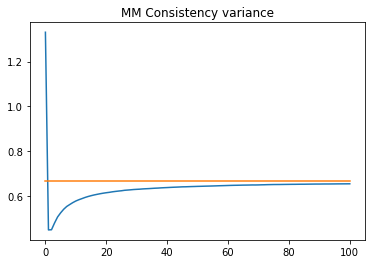

In [500]:
x = np.arange(len(moment_loc_array))
plt.plot(x, moment_loc_array)
plt.plot(x, [6 for x in range(len(moment_loc_array))])
plt.title('MM Consistency mean')
plt.show()

x = np.arange(len(moment_scale_array))
plt.plot(x, moment_scale_array)
plt.plot(x, [2/3 for x in range(len(moment_loc_array))])
plt.title('MM Consistency variance')
plt.show()

In [501]:
fit_loc_array = []
fit_scale_array = []

for i in tqdm(range(100, n, 10000)):
    little_sample = sample[:i]
    fit_loc_i, fit_scale_i = laplace.fit(little_sample)
    fit_loc_array.append(fit_loc_i)
    fit_scale_array.append(fit_scale_i)

100%|██████████| 101/101 [00:01<00:00, 82.20it/s]


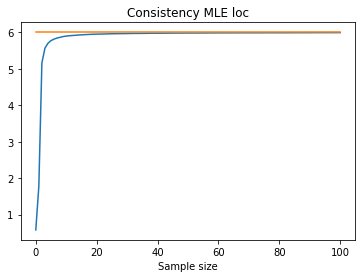

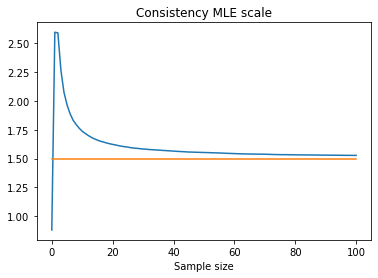

In [502]:
x = np.arange(len(fit_loc_array))
plt.plot(x, fit_loc_array)
plt.plot(x, [6 for x in range(len(moment_loc_array))])
plt.xlabel('Sample size')
plt.title('Consistency MLE loc')
plt.show()

x = np.arange(len(fit_scale_array))
plt.plot(x, fit_scale_array)
plt.plot(x, [3/2 for x in range(len(moment_loc_array))])
plt.xlabel('Sample size')
plt.title('Consistency MLE scale')
plt.show()

In [503]:
np.random.shuffle(sample)


In [504]:
asimpt_norm_m_mean = []
asimpt_norm_m_variance = []

n = len(sample)
for i in range(1000):
    arr = np.array(sample[1006*(i):1006*(i + 1)])
    E = np.sum(arr)/len(arr)
    squares = np.sum(np.square(arr))/(len(arr)-1)
    D = squares - E*E
    asimpt_norm_m_mean.append(math.sqrt(1006)*(E - 6))
    asimpt_norm_m_variance.append(math.sqrt(1006)*(D-1.5))

In [505]:
E = np.sum(asimpt_norm_m_mean)/len(asimpt_norm_m_mean)

In [506]:
E2 = np.sum(np.square(asimpt_norm_m_mean))/(len(asimpt_norm_m_mean) - 1)

In [507]:
D = E2 - E*E

In [508]:
math.sqrt(D)

2.1111059287976803

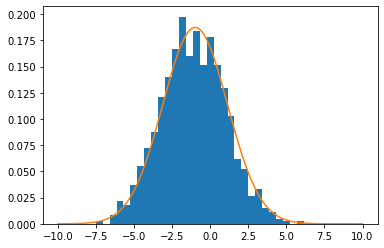

In [509]:
t = plt.hist(asimpt_norm_m_mean, bins = 30, density = True)
x_lin = np.linspace(-10, 10, 1000)
crv = norm.pdf(x_lin, loc = -1 , scale = 2.13)
plt.plot(x_lin, crv)

Все очень грустно :( Но может с ростом выборки все будет хорошо

Асимптотическая дисперсия: 2.13

In [510]:
E = np.sum(asimpt_norm_m_variance)/len(asimpt_norm_m_variance)

In [511]:
E2 = np.sum(np.square(asimpt_norm_m_variance))/(len(asimpt_norm_m_variance) - 1)

In [512]:
D = E2 - E*E

In [513]:
math.sqrt(D)

11.211344135458422

In [514]:
E

102.0177199046118

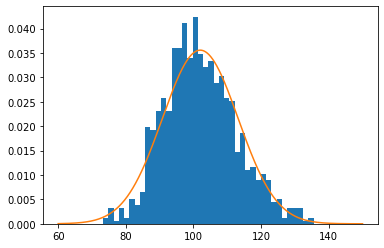

In [515]:
t = plt.hist(asimpt_norm_m_variance, bins = 40, density = True)
x_lin = np.linspace(60, 150, 1000)
crv = norm.pdf(x_lin, loc = 102.01 , scale = 11.211)
plt.plot(x_lin, crv)

Здесь уже не будет асимптотической нормальности к N(0,sigma_square)

In [536]:
from scipy.stats import t

In [537]:
def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), sem(data)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [539]:
sample = sample.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [540]:
len(sample)

1006000

In [541]:
mean_confidence_interval(sample, 0.95)

(5.960469660576761, 5.96892518550256)

In [542]:
mean_confidence_interval(sample, 0.99)

(5.959141197473237, 5.970253648606084)

In [544]:
kstest(sample, 'laplace', (6, 1.5))

KstestResult(statistic=0.0061735804673005296, pvalue=9.908330271747496e-34)

Вывод: 

1. С добавлением шумов асимптотическая нормальность уже не выполняется

2. Тест Колмогорова должен быть использован только для неслучайной функции распределения